In [23]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data_df = pd.read_csv('data/new_data.csv')
data_df.head()

,Unnamed: 0,Sex,Fall times in one year,Aid by hand or not,staircase_cross,force_platform,Bone fracture history,Hypertension,Osteoporosis,Visual impairment unadjustable by lenses,new_age,new_weight
0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,1,0
1,1,0,1,0,0,1,1.0,1.0,1.0,1.0,2,3
2,2,1,1,0,0,0,1.0,1.0,0.0,0.0,3,2
3,3,1,0,0,1,1,1.0,1.0,0.0,0.0,3,2
4,4,0,0,0,0,0,1.0,0.0,0.0,1.0,1,2


In [3]:
data_df = data_df.drop('Unnamed: 0',axis=1)
data = data_df.values

In [4]:
print(data.shape)

(80, 11)


In [5]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(data)

In [6]:
labels = kmeans.labels_
postive_data=np.zeros([np.sum(labels),data.shape[1]])
negative_data = np.zeros([(labels.shape[0]-postive_data.shape[0]),data.shape[1]])
print(postive_data.shape)
print(negative_data.shape)

(30, 11)
(50, 11)


In [7]:
postive_indices = []
negaive_indices = []

for i in range(len(labels)):
    if labels[i]:
        postive_indices.append(i)
    else:
        negaive_indices.append(i)

In [8]:
postive_data = data[postive_indices]
negative_data = data[negaive_indices]

In [9]:
label_names = list(data_df.columns)
postive_df = pd.DataFrame(postive_data)
negative_df = pd.DataFrame(negative_data)
postive_df.columns = label_names
negative_df.columns = label_names

In [10]:
print(postive_df.mean())

Sex                                         0.366667
Fall times in one year                      0.366667
Aid by hand or not                          0.233333
staircase_cross                             0.300000
force_platform                              0.266667
Bone fracture history                       0.333333
Hypertension                                0.533333
Osteoporosis                                0.400000
Visual impairment unadjustable by lenses    0.133333
new_age                                     2.833333
new_weight                                  2.266667
dtype: float64


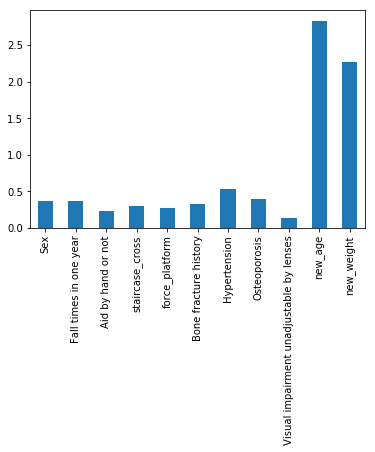

In [25]:
postive_df.mean().plot.bar()

In [16]:
print(negative_df.mean())

Sex                                         0.46
Fall times in one year                      0.10
Aid by hand or not                          0.04
staircase_cross                             0.14
force_platform                              0.26
Bone fracture history                       0.26
Hypertension                                0.44
Osteoporosis                                0.30
Visual impairment unadjustable by lenses    0.24
new_age                                     0.96
new_weight                                  1.82
dtype: float64


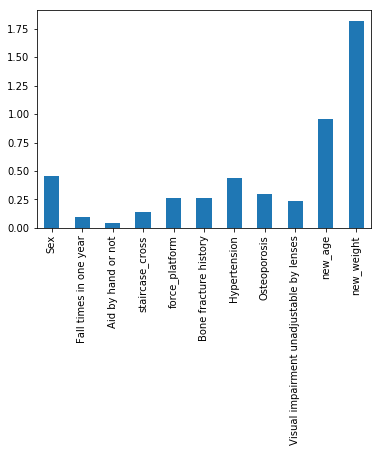

In [24]:
negative_df.mean().plot.bar()

In [18]:
postive_mean = postive_df.mean()
negative_mean = negative_df.mean()
mean_df = pd.DataFrame()
mean_df['class1'] = postive_mean
mean_df['class2'] = negative_mean
mean_df['class1-class2'] = postive_mean.subtract(negative_mean)
mean_df

,class1,class2,class1-class2
Sex,0.366667,0.46,-0.093333
Fall times in one year,0.366667,0.10,0.266667
Aid by hand or not,0.233333,0.04,0.193333
staircase_cross,0.300000,0.14,0.160000
force_platform,0.266667,0.26,0.006667
Bone fracture history,0.333333,0.26,0.073333
Hypertension,0.533333,0.44,0.093333
Osteoporosis,0.400000,0.30,0.100000
Visual impairment unadjustable by lenses,0.133333,0.24,-0.106667
new_age,2.833333,0.96,1.873333


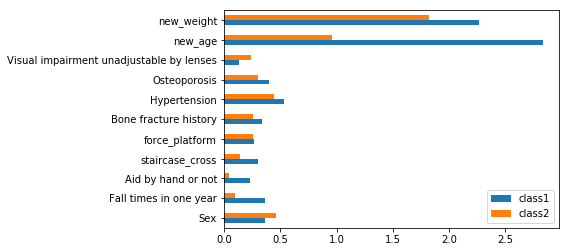

In [26]:
mean_df[['class1','class2']].plot.barh()

经过反复比较，最终选取了class2(nagative)作为平衡能力强的一类人，其各项指标除了体重和视力障碍都要比class1表现得更好

In [16]:
final_label = 1-labels
data_df['isbalance'] = pd.Series(final_label)
data_df.head()

,Sex,Fall times in one year,Aid by hand or not,staircase_cross,force_platform,Bone fracture history,Hypertension,Osteoporosis,Visual impairment unadjustable by lenses,new_age,new_weight,isbalance
0,1,0,0,0,0,0.0,1.0,0.0,0.0,1,0,1
1,0,1,0,0,1,1.0,1.0,1.0,1.0,2,3,0
2,1,1,0,0,0,1.0,1.0,0.0,0.0,3,2,0
3,1,0,0,1,1,1.0,1.0,0.0,0.0,3,2,0
4,0,0,0,0,0,1.0,0.0,0.0,1.0,1,2,1


In [17]:
data_df.to_csv('data/kmeans_result.csv')